# T-Distribution
 <hr style="border:2px solid #ff0000 "><hr>

<b>Daniel A Udasco</b>
<br>3rd Year Comp Eng Tech Student

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

## Import "transformer-voltage-10-sample.csv" Dataset

In [2]:
df = pd.read_csv(r"unprocessed/transformer-voltage-10-sample.csv",
                 delimiter=",")
df

,Sample,Voltage
0,1,118.3
1,2,119.2
2,3,119.7
3,4,119.5
4,5,120.0
5,6,120.1
6,7,120.2
7,8,120.8
8,9,121.5
9,10,121.8


## Dataframe Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   10 non-null     int64  
 1   Voltage  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


## Summarize Stats

In [4]:
df.describe()

,Sample,Voltage
count,10.00000,10.000000
mean,5.50000,120.110000
std,3.02765,1.050344
min,1.00000,118.300000
25%,3.25000,119.550000
50%,5.50000,120.050000
75%,7.75000,120.650000
max,10.00000,121.800000


## T-critical (two-tailed test)

In [5]:
alpha = 0.05
dof = df['Voltage'].count()-1

t_critical = stats.t.ppf(1-alpha/2,dof)
t_critical

np.float64(2.262157162854099)

## Confidence Interval (CI)

In [6]:
ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = df['Voltage'].count()-1,
    loc = df['Voltage'].mean(),
    scale = df['Voltage'].std(ddof=1)/np.sqrt(df['Voltage'].count())
)

# CI Lower
print("Lower: " + str(ci_lower.round(2)))

# CI Upper
print("Upper: " + str(ci_upper.round(2)))

# Print CI
print("Confidence Interval = " + str(ci_lower.round(2)) + ", " + str(ci_upper.round(2)))

Lower: 119.36
Upper: 120.86
Confidence Interval = 119.36, 120.86


## Histogram with Normal distribution curve and Confidence Interval Plot

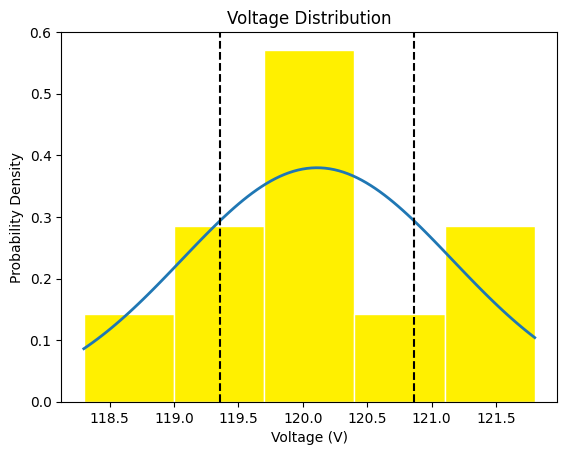

In [7]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# normal distribution
x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot(x,p,linewidth=2)

# histogram
plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=1,
         color='#fff000',
         edgecolor='#ffffff'
)
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(x=ci_lower,color='k',linestyle='--')
plt.axvline(x=ci_upper,color='k',linestyle='--')
plt.show()

# Import "shoe-inventory.csv" Dataset

In [8]:
df = pd.read_csv(r"unprocessed/shoe-inventory.csv",
                 delimiter=",")
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


# Shape of "shoe-inventory.csv" Dataset (Row and Column Count)

In [9]:
df.shape

(17, 13)

## Mean of Size:6

In [10]:
mean_size_6 = df.iloc[0,1:13].mean()
mean_size_6

np.float64(2.9166666666666665)

## Standard Deviation of Size:6

In [11]:
std_size_6 = df.iloc[0,1:13].std()
std_size_6

np.float64(1.781640374554423)

## 95% CI of Size:6 

In [12]:
n = df.shape[1]-1 # To return 13 in (17,13)

lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean_size_6,
    scale = std_size_6/np.sqrt(n)
)

# CI Lower
print("Lower: " + str(lower_6.round(2)))

# CI Upper
print("Upper: " + str(upper_6.round(2)))

# Print CI
print("Confidence Interval = " + str(lower_6.round(2)) + ", " + str(upper_6.round(2)))

Lower: 1.78
Upper: 4.05
Confidence Interval = 1.78, 4.05


In [13]:
# 95% Confidence Level
mean = df.iloc[:17,1:13].mean(axis=1) # all 16 sizes
std = df.iloc[:17,1:13].std(axis=1)

df['ci_lower'], df['ci_upper'] = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)

/opt/anaconda3/envs/MLenv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/anaconda3/envs/MLenv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


## Print updated Dataframe

In [19]:
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ci_lower,ci_upper
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1,4
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0,2
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0,3
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1,4
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4,8
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8,13
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14,23
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24,35
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19,26
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14,20


## Fill NAN (missing values) with 0

In [ ]:
df['ci_lower'] = df['ci_lower'].fillna(0)
df['ci_upper'] = df['ci_upper'].fillna(0)

## Convert to int and round to 0

In [ ]:
df['ci_lower'] = df['ci_lower'].astype(int).round()
df['ci_upper'] = df['ci_upper'].astype(int).round()

## Recommended No. of Shoe pairs by Size

In [ ]:
df[['Size','ci_upper']]

,Size,ci_upper
0,6.0,4
1,6.5,2
2,7.0,3
3,7.5,4
4,8.0,8
5,8.5,13
6,9.0,23
7,9.5,35
8,10.0,26
9,10.5,20
